<h1> Title: Predicting Regional Video Game Sales</h2>
<h2>Authors:</h2> 

<ul style="list-style-type:none">
  <li>Aimen Altaiyeb</li>
  <li>James Meaden</li>
  <li>Josiah Sanchez</li>
  <li>Kevin Daill</li>
  <li>Nathan Huvan</li>
</ul>  

<h2> <b>Introduction</b></h2>

<p>We will predict the sales for a video game in one region based
on the sales from the other regions. </p>

<h2> <b>Selection Of Data:</b></h2>

<p>Video Game Sales with Ratings, downloaded from Kaggle:<br>
<a href="https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings">
    https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings</a><br> The dataset contains sixteen different feature such as: the name of the game, the platform,
and the publisher just to name a few. Our report will focus on the genre and
sales features.</p>

<h2>Goal:</h2>

<p>To help video game companies determine what location they can expect favorable sales results based on salse data from other regions.</p>

<h2>Features:</h2>
<p>There are sixteen different features, of the sixteen our report will focus on the
following features:
<ul>
    <li>Genre</li>
    <li>NA_Sales</li>
    <li>EU_Sales</li>
    <li>JP_Sales</li>
    <li>Other_Sales</li>
    <li>Global_Sales</li>
</ul>
</p>

<h2><b>Methods:</b></h2>
<p>Tools:</p>
<ul>
	<li>Numpy, Pandas, Matplotlib, scipy.stats, and Seaborn for data analysis and visualization</li>
	<li>sklearn.model_selection, sklearn.preprocessing, and sklearn.neighbors to implement KNN and Linear Regression</li>
	<li>Used Google Colab connected to Git</li>
</ul>
<p>Inference methods:</p>
<ul>
	<li>Used KNN and Linear Regression to get the MSE and RMSE to predict sales in Countries
</li>
</ul>



# New Section

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import scipy.stats
import math

df = pd.read_csv("https://raw.githubusercontent.com/nhuven/cst383/main/Video_Games_Sales_as_at_22_Dec_2016.csv")

<h1>Data Exploration</h1>


There are several columns related to sales as well as details about genres, publishers, and critic scores.

Many of the critic score columns appear to be missing data. This may result in those columns being excluded from the models.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Taking a look at some of the rows it appears we have a mix of both categorical and numerical data. 

It is possible we will need to convert some of the categorical data into numerical in order to use it in the models.

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


<h2> Graphical Exploration of the data<h2>

<p> Bar plots to show the game sales based on genre and in different locations. The Dataset contains the locations for
North America, Europe, Japan, and all others listed as Other.
Initial observations show that Action games are the most popular
in a majority of the markets with the exception of Japan, where
Role Playing Games (RPG) account for a majority. </p>

Text(0, 0.5, 'Sales')

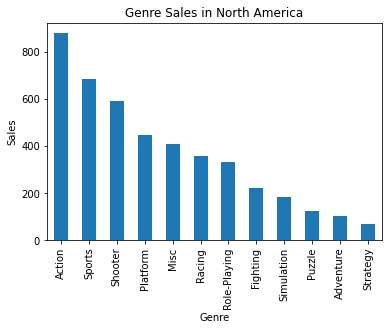

In [ ]:
df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False).plot.bar()
plt.title('Genre Sales in North America')
plt.xlabel('Genre')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

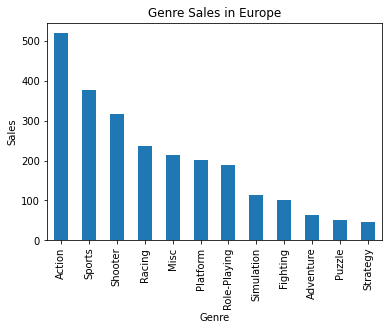

In [ ]:
df.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False).plot.bar()
plt.title('Genre Sales in Europe')
plt.xlabel('Genre')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

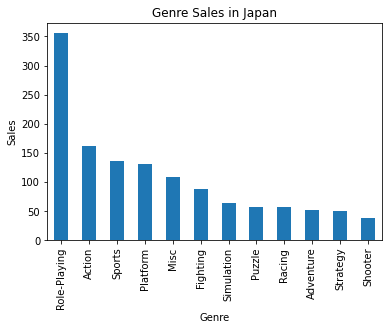

In [ ]:
df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False).plot.bar()
plt.title('Genre Sales in Japan')
plt.xlabel('Genre')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

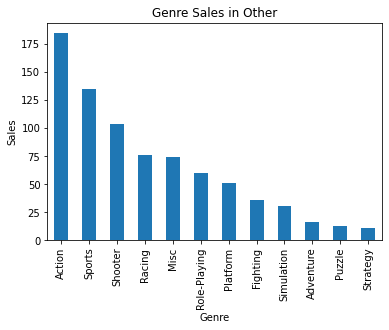

In [ ]:
df.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=False).plot.bar()
plt.title('Genre Sales in Other')
plt.xlabel('Genre')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

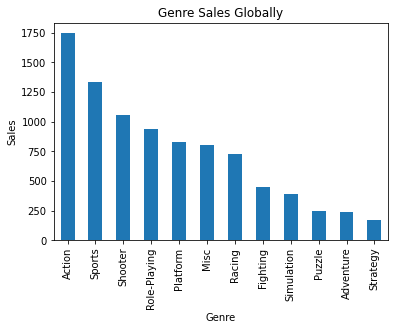

In [ ]:
df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).plot.bar()
plt.title('Genre Sales Globally')
plt.xlabel('Genre')
plt.ylabel('Sales')



```
# This is formatted as code
```

<h1>Genre Pie Chart After Cleaning the Data</h1>
<p>NA values were dropped from Genre and the pie chart reveals an intersting peculiarity with the dataset. Although the bar plots reveal Action and RPG games acount for the most in sales, The Sports genre is the most popular based on the total number of games within that genre  but not the highest grossing sales genre.</p>

<h1>Pie Chart Of Number Of Sales Of Video Game By Genre</h1>

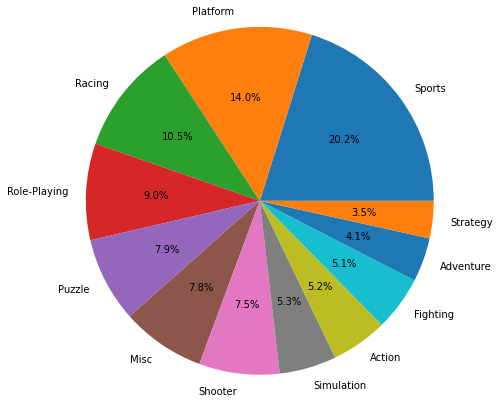

In [ ]:
pie_vals = df['Genre'].value_counts()
pie_labels = df['Genre'].dropna().unique() 
plt.pie(pie_vals, labels=pie_labels, radius=2.0, autopct='%0.1f%%');

<h1>Pie Chart Of The Amount Of Sales Of Video Game By Genre</h1>

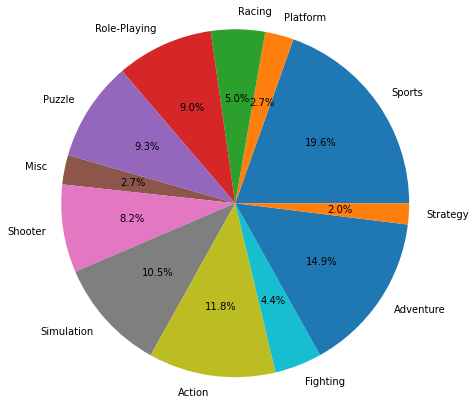

In [ ]:
pie_vals = df.groupby('Genre')['Global_Sales'].sum()
plt.pie(pie_vals, labels=pie_labels, radius=2.0, autopct='%0.1f%%');

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

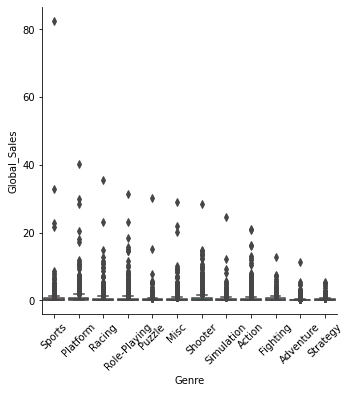

In [ ]:
sns.catplot(x="Genre", y="Global_Sales", kind="box", data=df)
plt.xticks(rotation=45)

<h1>Further Exploration</h1>
<p> Below the data is examined by applying different masks of the dataset. Wii Sports for example, is the only video game with sales greater than 50 million. A new table will be created with Wii Sports removed since it skews the sports genre data. (Wii sports was a games bundled with the Wii and reflects more of the success of that console than that genre)</p>

In [ ]:
df[df['Global_Sales'] > 50]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E


In [ ]:
df[df['Genre'].isna() == True]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe(percentiles=[]).round(1)

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.0,16719.0,16719.0,16719.0,16719.0,16719.0,8137.0,8137.0,7590.0
mean,2006.5,0.3,0.1,0.1,0.0,0.5,69.0,26.4,162.2
std,5.9,0.8,0.5,0.3,0.2,1.5,13.9,19.0,561.3
min,1980.0,0.0,0.0,0.0,0.0,0.0,13.0,3.0,4.0
50%,2007.0,0.1,0.0,0.0,0.0,0.2,71.0,21.0,24.0
max,2020.0,41.4,29.0,10.2,10.6,82.5,98.0,113.0,10665.0


In [ ]:
df[df['Year_of_Release'] > 2016]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16385,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Remove Wii Sports since it's skews the sports genre data. Wii sports was a games bundled with the Wii and reflects more of the success of that console than that genre
tbl = df.drop(df[df['Name'] == "Wii Sports"].index)
# Remove rows that appear to be truly bad data due to missing game name and genre
tbl.drop(tbl[tbl['Name'].isna()].index, inplace=True)

After removing Wii Sports we can see that sports no longer has the category with the highest selling game in it.  Also the plot becomes much more compact.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

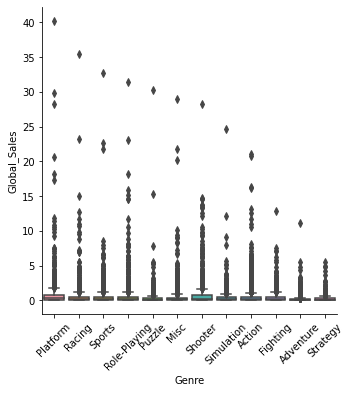

In [ ]:
sns.catplot(x="Genre", y="Global_Sales", kind="box", data=tbl)
plt.xticks(rotation=45)

<h1>Methods</h1>
<p>In order to test our hypothesis we will utilize kNN regression and also linear regression. We will examine the MSE/RMSE of our predictions to assess the accuracy of our model.

In order to do this we will use both sales data and genre data. Since genre is categorical we will need to convert it into numerical data using the dummies method.<p>

In [ ]:
# Convert the categorical feature Genre into numerical
tbl = pd.get_dummies(tbl, columns =['Genre'], drop_first = True)

<h1>KNN Regression<h1>

<h2>Test MSE and RMSE of Global sales<h2>

<p>The MSE and RMSE is pretty high when attempting to predict global sales<p>

In [ ]:
predictors = ['Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform',
              'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
              'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy']
target = ['Global_Sales']

X = (tbl[predictors]).values
    
y = (tbl['Global_Sales']).values.astype(int)

#70%--30% split of data into a Training Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
reg = KNeighborsRegressor()
reg.fit(X_train, y_train)

predictions = reg.predict(X_test)
MSE  = ((predictions - y_test)**2).mean()
RMSE = math.sqrt(MSE)
print('MSE: {0:.3f}'. format(MSE))
print('RMSE: {0:.3f}'. format(RMSE))

MSE: 1.992
RMSE: 1.411


<h1>KNN Regression</h1>
<h2>Test MSE and RMSE After Adding Critic Score Feature</h2>
<p>The MSE and RMSE did not improve by addding this feature</p>

In [ ]:
# Let's include Critic Score to try and improve the accuracy
# Will need to exclude rows where critic score is not available since there are many rows missing data
tbl2 = tbl.drop(tbl[tbl['Critic_Score'].isna()].index)

# Then make sure critic score is included as a predictor
predictors = ['Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform',
              'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
              'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Critic_Score']
target = ['Global_Sales']

X = (tbl2[predictors]).values
    
y = (tbl2['Global_Sales']).values.astype(int)

#70%--30% split of data into a Training Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
reg = KNeighborsRegressor()
reg.fit(X_train, y_train)

predictions = reg.predict(X_test)
MSE  = ((predictions - y_test)**2).mean()
RMSE = math.sqrt(MSE)
print('MSE: {0:.3f}'. format(MSE))
print('RMSE: {0:.3f}'. format(RMSE))

MSE: 2.100
RMSE: 1.449


<h2>Predicting one region's sales based on the sales of another<h2>
<p>We will now move on to trying to predict the sales in one region based on the sales of another. We expect this to be an important question for video game companies to answer as they often will release a game in one region and then need to make decisions about making it availble in another.<p>

<p>These decisions have a great deal of risk associated to them as there are varying degrees of resources they can choose to devout to making region specific updates and region specific marketing. Gaining insight into potential sales in a target region can assist in making these decisions.<p>

<h2>Method to evaluate region by region<h2>
<p>The below method will assist in being able to paramaterize the kNN regression model. We can pass in our target region and the region(s) to use as predictors. In this way we can test all combinations of potential target regions and predictor regions.<p>

In [ ]:
def region_sale_predict(target, predictors, tbl):
  X = tbl[predictors].values
  y = tbl[target].values

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  reg = KNeighborsRegressor()
  reg.fit(X_train, y_train)
  predicted = reg.predict(X_test)

  actual = y_test

  MSE = ((predicted - actual)**2).mean()
  RMSE = np.sqrt(MSE)
  #print('MSE: {0:.3f}'. format(MSE))
  #print('RMSE: {0:.3f}'. format(RMSE))

  return MSE, RMSE

In [ ]:
NA_mse, NA_rmse = region_sale_predict('NA_Sales', ['EU_Sales', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform',
              'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
              'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy'], tbl)

In [ ]:
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_results = pd.DataFrame({'region_target':[], 'region_source':[], 'mse':[], 'rmse':[]})
for region in regions:
  for region2 in regions:
    if region != region2:
      predictors = np.array([region2])
      mses=[]
      rmses=[]
      mse, rmse = region_sale_predict(region, [region2, 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform',
              'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
              'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy'], tbl)
      mses.append(mse)
      rmses.append(rmse)
      region2_mse = np.concatenate([[region2],mses])
      region2_rmse = np.concatenate([[region2],rmses])
      region_results = region_results.append({'region_target':region, 'region_source':region2, 'mse':mse.round(3), 'rmse':rmse.round(3)}, ignore_index=True)
      print('{} predicted sales based on {} known sales: MSE {}, RMSE {}'.format(region, region2, mse.round(3), rmse.round(3)))

  #region_mse = np.vstack([region_mse,np.concatenate([[region], region2_mse])])
  #region_rmse = np.vstack([region_rmse,np.concatenate([[region], region2_rmse])])

NA_Sales predicted sales based on EU_Sales known sales: MSE 0.378, RMSE 0.615
NA_Sales predicted sales based on JP_Sales known sales: MSE 0.563, RMSE 0.75
NA_Sales predicted sales based on Other_Sales known sales: MSE 0.468, RMSE 0.684
EU_Sales predicted sales based on NA_Sales known sales: MSE 0.097, RMSE 0.312
EU_Sales predicted sales based on JP_Sales known sales: MSE 0.173, RMSE 0.416
EU_Sales predicted sales based on Other_Sales known sales: MSE 0.072, RMSE 0.269
JP_Sales predicted sales based on NA_Sales known sales: MSE 0.078, RMSE 0.279
JP_Sales predicted sales based on EU_Sales known sales: MSE 0.079, RMSE 0.281
JP_Sales predicted sales based on Other_Sales known sales: MSE 0.102, RMSE 0.319
Other_Sales predicted sales based on NA_Sales known sales: MSE 0.024, RMSE 0.154
Other_Sales predicted sales based on EU_Sales known sales: MSE 0.017, RMSE 0.13
Other_Sales predicted sales based on JP_Sales known sales: MSE 0.031, RMSE 0.176


In [ ]:
region_results

,region_target,region_source,mse,rmse
0,NA_Sales,EU_Sales,0.378,0.615
1,NA_Sales,JP_Sales,0.563,0.750
2,NA_Sales,Other_Sales,0.468,0.684
3,EU_Sales,NA_Sales,0.097,0.312
4,EU_Sales,JP_Sales,0.173,0.416
5,EU_Sales,Other_Sales,0.072,0.269
6,JP_Sales,NA_Sales,0.078,0.279
7,JP_Sales,EU_Sales,0.079,0.281
8,JP_Sales,Other_Sales,0.102,0.319
9,Other_Sales,NA_Sales,0.024,0.154


<h1>Bar Plots Reveal Impact Of Sales From One Region On Another</h1>
<p>The bar plots reveal the following:</p>
<ul>
    <li>North American Sales can be best predicted using European Sales data</li>
    <li>European Sales can be best predicted using Other Sales data</li>
    <li>Japan Sales can be best predicted using North American Sales data</li>
    <li>Other Sales can be best predicted using European Sales data</li>
</ul>
<br>

Text(0.5, 1.0, 'NA_Sales RMSE')

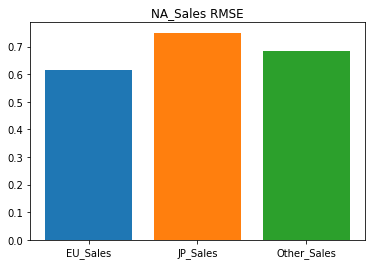

In [ ]:
plt.bar(x='EU_Sales', height=region_results.iloc[0]['rmse'])
plt.bar(x='JP_Sales', height=region_results.iloc[1]['rmse'])
plt.bar(x='Other_Sales', height=region_results.iloc[2]['rmse'])
plt.title('NA_Sales RMSE')

#North American Sales can be best predicted using European Sales Data

<BarContainer object of 1 artists>

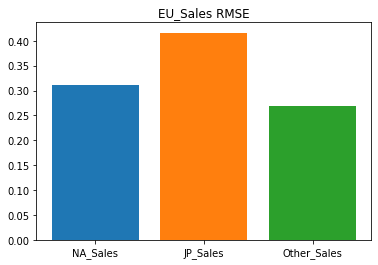

In [ ]:
plt.title('EU_Sales RMSE')
plt.bar(x='NA_Sales', height=region_results.iloc[3]['rmse'])
plt.bar(x='JP_Sales', height=region_results.iloc[4]['rmse'])
plt.bar(x='Other_Sales', height=region_results.iloc[5]['rmse'])

#European Sales can be best predicted using Other Sales Data

<BarContainer object of 1 artists>

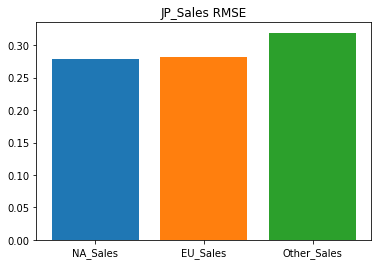

In [ ]:
plt.title('JP_Sales RMSE')
plt.bar(x='NA_Sales', height=region_results.iloc[6]['rmse'])
plt.bar(x='EU_Sales', height=region_results.iloc[7]['rmse'])
plt.bar(x='Other_Sales', height=region_results.iloc[8]['rmse'])

#Japan Sales can be best predicted using North American Sales Data

<BarContainer object of 1 artists>

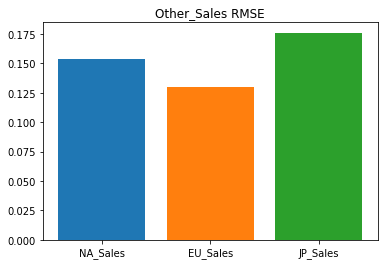

In [ ]:
plt.title('Other_Sales RMSE')
plt.bar(x='NA_Sales', height=region_results.iloc[9]['rmse'])
plt.bar(x='EU_Sales', height=region_results.iloc[10]['rmse'])
plt.bar(x='JP_Sales', height=region_results.iloc[11]['rmse'])

#Other Sales can be best predicted using European Sales Data

<h1>Modifying <b>region_sale_predict</b> To Include Arguements for K and Weights</h1>

In [ ]:
def region_sale_predict_kw(target, predictors, tbl, k_value, w_value):
  X = tbl[predictors].values
  y = tbl[target].values

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  reg = KNeighborsRegressor(n_neighbors=k_value, weights=w_value)
  reg.fit(X_train, y_train)
  predicted = reg.predict(X_test)

  actual = y_test

  MSE = ((predicted - actual)**2).mean()
  RMSE = np.sqrt(MSE)
  #print('MSE: {0:.3f}'. format(MSE))
  #print('RMSE: {0:.3f}'. format(RMSE))

  return MSE, RMSE

<h1>KNN Regression With K=9 and Weights = distance<h1>

In [ ]:
k = 9
weights = 'distance'
#weights = 'uniform'
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_results2 = pd.DataFrame({'region_target':[], 'region_source':[], 'mse':[], 'rmse':[]})
for region in regions:
  for region2 in regions:
    if region != region2:
      predictors = np.array([region2])

      mse, rmse = region_sale_predict(region, [region2, 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform',
              'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
              'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy'], tbl)

      region_results2 = region_results.append({'region_target':region, 'region_source':region2, 'mse':mse.round(3), 'rmse':rmse.round(3)}, ignore_index=True)
      print('{} predicted sales based on {} known sales: MSE {}, RMSE {}'.format(region, region2, mse.round(3), rmse.round(3)))

NA_Sales predicted sales based on EU_Sales known sales: MSE 0.378, RMSE 0.615
NA_Sales predicted sales based on JP_Sales known sales: MSE 0.563, RMSE 0.75
NA_Sales predicted sales based on Other_Sales known sales: MSE 0.468, RMSE 0.684
EU_Sales predicted sales based on NA_Sales known sales: MSE 0.097, RMSE 0.312
EU_Sales predicted sales based on JP_Sales known sales: MSE 0.173, RMSE 0.416
EU_Sales predicted sales based on Other_Sales known sales: MSE 0.072, RMSE 0.269
JP_Sales predicted sales based on NA_Sales known sales: MSE 0.078, RMSE 0.279
JP_Sales predicted sales based on EU_Sales known sales: MSE 0.079, RMSE 0.281
JP_Sales predicted sales based on Other_Sales known sales: MSE 0.102, RMSE 0.319
Other_Sales predicted sales based on NA_Sales known sales: MSE 0.024, RMSE 0.154
Other_Sales predicted sales based on EU_Sales known sales: MSE 0.017, RMSE 0.13
Other_Sales predicted sales based on JP_Sales known sales: MSE 0.031, RMSE 0.176


Increasing the value of k does not lead to significant improvement in MSE/RMSE. In some instances it worsens the predictions.

In [ ]:
region_results2

,region_target,region_source,mse,rmse
0,NA_Sales,EU_Sales,0.378,0.615
1,NA_Sales,JP_Sales,0.563,0.750
2,NA_Sales,Other_Sales,0.468,0.684
3,EU_Sales,NA_Sales,0.097,0.312
4,EU_Sales,JP_Sales,0.173,0.416
5,EU_Sales,Other_Sales,0.072,0.269
6,JP_Sales,NA_Sales,0.078,0.279
7,JP_Sales,EU_Sales,0.079,0.281
8,JP_Sales,Other_Sales,0.102,0.319
9,Other_Sales,NA_Sales,0.024,0.154


<h1>Linear Regression</h1>

<p>We will take a look at how well linear regression performs in order to see if it offers any advantages over kNN.<p>

In [ ]:
def lr_region_sale_predict(target, predictors, tbl):
  X = tbl[predictors].values
  y = tbl[target].values

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

  reg = LinearRegression()
  reg.fit(X_train, y_train)
  predicted = reg.predict(X_test)

  actual = y_test

  MSE = ((predicted - actual)**2).mean()
  RMSE = np.sqrt(MSE)

  return MSE, RMSE

regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
lr_region_results = pd.DataFrame({'region_target':[], 'region_source':[], 'mse':[], 'rmse':[]})
for region in regions:
  for region2 in regions:
    if region != region2:
      predictors = np.array([region2])
      
      mse, rmse = lr_region_sale_predict(region, [region2, 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform',
              'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
              'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy'], tbl)

      lr_region_results = lr_region_results.append({'region_target':region, 'region_source':region2, 'mse':mse.round(3), 'rmse':rmse.round(3)}, ignore_index=True)
      print('{} predicted sales based on {} known sales: MSE {}, RMSE {}'.format(region, region2, mse.round(3), rmse.round(3)))

NA_Sales predicted sales based on EU_Sales known sales: MSE 0.412, RMSE 0.642
NA_Sales predicted sales based on JP_Sales known sales: MSE 0.542, RMSE 0.737
NA_Sales predicted sales based on Other_Sales known sales: MSE 0.532, RMSE 0.73
EU_Sales predicted sales based on NA_Sales known sales: MSE 0.131, RMSE 0.362
EU_Sales predicted sales based on JP_Sales known sales: MSE 0.157, RMSE 0.396
EU_Sales predicted sales based on Other_Sales known sales: MSE 0.107, RMSE 0.327
JP_Sales predicted sales based on NA_Sales known sales: MSE 0.083, RMSE 0.289
JP_Sales predicted sales based on EU_Sales known sales: MSE 0.086, RMSE 0.293
JP_Sales predicted sales based on Other_Sales known sales: MSE 0.098, RMSE 0.313
Other_Sales predicted sales based on NA_Sales known sales: MSE 0.026, RMSE 0.16
Other_Sales predicted sales based on EU_Sales known sales: MSE 0.017, RMSE 0.13
Other_Sales predicted sales based on JP_Sales known sales: MSE 0.028, RMSE 0.168


In [ ]:
lr_region_results

,region_target,region_source,mse,rmse
0,NA_Sales,EU_Sales,0.412,0.642
1,NA_Sales,JP_Sales,0.542,0.737
2,NA_Sales,Other_Sales,0.532,0.730
3,EU_Sales,NA_Sales,0.131,0.362
4,EU_Sales,JP_Sales,0.157,0.396
5,EU_Sales,Other_Sales,0.107,0.327
6,JP_Sales,NA_Sales,0.083,0.289
7,JP_Sales,EU_Sales,0.086,0.293
8,JP_Sales,Other_Sales,0.098,0.313
9,Other_Sales,NA_Sales,0.026,0.160


<h1>Linear And KNN Regression MSE And RMSE Differences</h1>
<p>We can see that there is only negligible difference between linear regression and kNN MSE/RMSE values.<p>

In [ ]:
differences = lr_region_results.copy()
differences['mse'] = lr_region_results['mse'] - region_results['mse']
differences['rmse'] = lr_region_results['rmse'] - region_results['rmse']
differences

,region_target,region_source,mse,rmse
0,NA_Sales,EU_Sales,0.034,0.027
1,NA_Sales,JP_Sales,-0.021,-0.013
2,NA_Sales,Other_Sales,0.064,0.046
3,EU_Sales,NA_Sales,0.034,0.050
4,EU_Sales,JP_Sales,-0.016,-0.020
5,EU_Sales,Other_Sales,0.035,0.058
6,JP_Sales,NA_Sales,0.005,0.010
7,JP_Sales,EU_Sales,0.007,0.012
8,JP_Sales,Other_Sales,-0.004,-0.006
9,Other_Sales,NA_Sales,0.002,0.006


<h1><b>Results</b></h1>
<p>We were able to predict the sales of video games in one region based on the sales data in another region. One of the best predictions with the lowest RMSE values was the impact the sales in Europe have on the Other region. Testing the KNN Regression model with different values of k had little impact on the RMSE value. (In our report we have provided the default with k =5 and uniform weight along with another with k=9 and distance weight.) If there were more features, an improvement in MSE and RMSE could be achieved. <br>

<h1><b>Discussion</b></h1>

<p>
A lot of the predictions that we found have lots of correlations to one another.
One of the comparisons that we can see between each of the different regions.
Most notably, when it comes to Europe and North America which share the same interests in terms of genre. Due to these similarities, we can easily determine the North American sales with the Europe sales. However, that does not work vice versa. Instead of being able to determine the Europe sales with North America, we are able to determine this through Other region sales. However, since RPG's tend to dominate the Japanese market and a similar interest here in North America we can predict the Japanese market sales with North America.
</p>

<h1><b>Summary</b></h1>
<p>The most important findings would be the bar plots of the KNN Regression results that show the impact of sales from other regions. One interesting observation is there seems to be a quality factor that contributes to the amount of money a game can bring in. For example, the first pie chart shows Sports with the most number of sales but Platform games bring in the most money as shown in the subsequent pie chart. The support for this is not conclusive because there could have been games where the cost was high and consumers were still willing to pay the price even if the game turned out to be bad. It would be interesting to see a feature added for the number of video games where a refund was given or use the critic score feature. This would do a better job of proving price equals quality.</p>
